In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import statsmodels.api as sm

In [4]:
def logistic(x):
    return 1.0/(1 + np.exp((-1.0)*x))

In [8]:
x = np.linspace(-6,6,500)
y = np.array([logistic(ele) for ele in x])

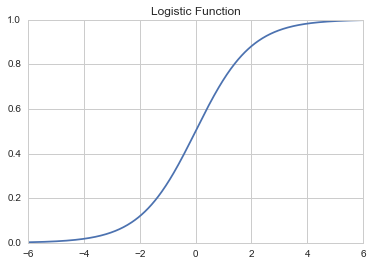

In [10]:
plt.plot(x,y)
plt.title('Logistic Function')

In [19]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [20]:
def check_affair(x):
    if x==0:
        return 0
    else:
        return 1

In [21]:
df['Had_Affair'] = df['affairs'].apply(check_affair)

In [22]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6361,5,32,13.0,2,3,17,4,3,0,0
6362,4,32,13.0,1,1,16,5,5,0,0
6363,5,22,2.5,0,2,14,3,1,0,0
6364,5,32,6.0,1,3,14,3,4,0,0
6365,4,22,2.5,0,2,16,2,4,0,0


In [23]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


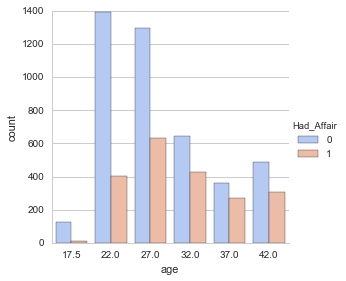

In [26]:
sns.factorplot('age',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

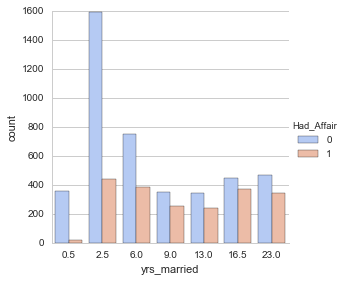

In [27]:
sns.factorplot('yrs_married',data=df,hue="Had_Affair",palette='coolwarm',kind='count')

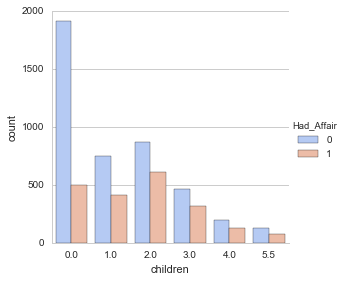

In [28]:
sns.factorplot('children',data=df,hue="Had_Affair",palette='coolwarm',kind='count')

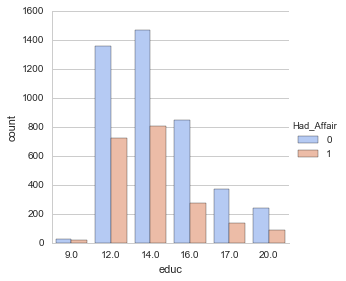

In [29]:
sns.factorplot('educ',data=df,hue="Had_Affair",palette='coolwarm',kind='count')

In [30]:
occ_dummies = pd.get_dummies(df['occupation'])

In [31]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [32]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [33]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [34]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [35]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [36]:
X = pd.concat([df,occ_dummies,hus_occ_dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,...,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,2,5,0.111111,1,...,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3,4,3.230769,1,...,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,3,5,1.400000,1,...,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,5,5,0.727273,1,...,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,3,4,4.666666,1,...,1,0,0,0,0,0,0,1,0,0


In [37]:
X = X.drop(['occupation','occupation_husb','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,Had_Affair,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,1,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
Y = df.Had_Affair
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [44]:
#X = X.drop(['occ1','hocc1'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,Had_Affair,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,1,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,1,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,1,0,1,0,0,0,0,0,1,0,0


In [45]:
X = X.drop('Had_Affair',axis=1)

In [46]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [47]:
Y.shape

(6366,)

In [48]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [50]:
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

0.72588752748978946

In [51]:
Y.mean()

0.32249450204209867

In [55]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [56]:
coeff_df

,0,1
0,rate_marriage,[-0.697868921518]
1,age,[-0.0563524519912]
2,yrs_married,[0.103881041122]
3,children,[0.0180882040795]
4,religious,[-0.368533627684]
5,educ,[0.00860312405338]
6,occ2,[0.295803211279]
7,occ3,[0.605342608084]
8,occ4,[0.344570254513]
9,occ5,[0.940346677513]


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
class_predict = log_model2.predict(X_test)
print metrics.accuracy_score(Y_test,class_predict)

0.722989949749
